# Simulations en électrocinétique et électronique

## Circuits du premier ordre

### Mise en place théorique

#### 1. Déterminer l’équation différentielle vérifiée par la tension $u_c$ aux bornes du condensateur.

$\underline{u_c} = \dfrac1{jwRC + 1}\underline{e}$

D'où

$$
\dfrac{du_c}{dt}+\dfrac{u_c}{RC}=\dfrac{e}{RC}
$$

### Réponse en régime permanent

#### 2. Ecrire un programme Python permettant de déterminer l’évolution de $u_c(t)$ dans le cas d’un échelon de tension (c’est–à–dire $e(t = 0^−) = 0$ et $e(t = 0^+) = E_0$).

*Importation des modules*

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from math import pi

*Fonction euler, pour approcher des fonctions à partir de l'équation différentielle*

In [161]:
def euler(f, t0, y0, tmax, h):
    """
    Une version de la méthode d'Euler pour résoudre une équation différentielle
    
    :param: f La fonction de dérivée de l'équation différentielle
    :param: t0 Le temps initial
    :param: y0 La valeur initiale
    :param: tmax Le temps maximal
    :param: h Le pas de calcul
    :return: x, y Les valeurs de temps et de la fonction
    """
    N = round((tmax - t0) / h)

    x = np.linspace(t0, tmax, N)
    y = np.empty(N)
    y[0] = y0

    for i in range(1, len(x)):
        y[i] = y[i - 1] + h * f(y[i - 1], x[i - 1])
    
    return x, y

*Une fonction qui permet d'utiliser des fonctions à la fois pour les nombres et pour les arrays numpy*

In [162]:
def numpyfy(f):
    def g(t):
        if isinstance(t, (float, int)):
            return f(t)
        else:
            return np.fromiter((f(e) for e in t), dtype=float)
    return g

*Constantes*

In [163]:
E0 = 5 #V
R = 10 ** 3 #Ohm
C = 10 ** -8 #Farad
T = 1e-5
t0, tm = 0, 10 * T # s
w = 2 * np.pi / T

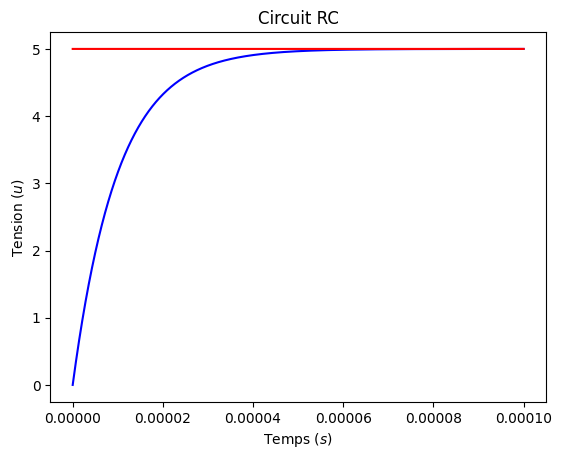

In [164]:
@numpyfy
def e_echelon(t):
    return 0 if t < 0 else E0

def fu(y, t):
    return (e_echelon(t) - y) / (R * C)

plt.title('Circuit RC')

plt.xlabel('Temps ($s$)')
plt.ylabel('Tension ($u$)')

x, y = euler(fu, t0, 0, tm, T / 1000)
plt.plot(x, y, '-b', label='$u(t)$')
plt.plot(x, e_echelon(x), '-r', label='$e(t)$')

plt.show()

#### 3. Modifier ce programme afin de déterminer l’évolution de $u_c(t)$ dans le cas du régime libre (c’est–à–dire $e(t = 0^−) = E_0$ et $e(t = 0^+) = 0)$.

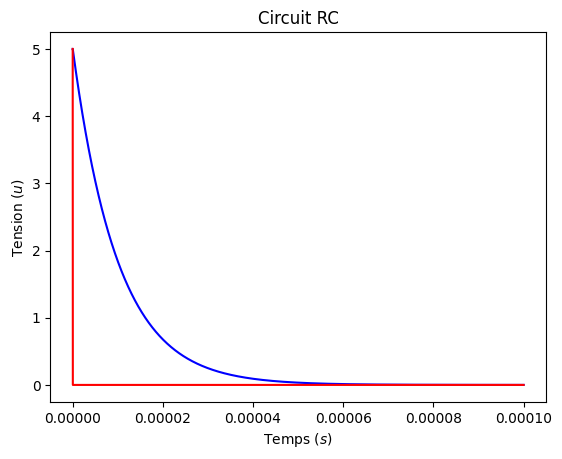

In [165]:
@numpyfy
def e_libre(t):
    return 0 if t > 0 else E0

def fu(y, t):
    return (e_libre(t) - y) / (R * C)

plt.title('Circuit RC')

plt.xlabel('Temps ($s$)')
plt.ylabel('Tension ($u$)')

x, y = euler(fu, t0, E0, tm, T / 1000)
plt.plot(x, y, '-b', label='$u(t)$')
plt.plot(x, e_libre(x), '-r', label='$e(t)$')

plt.show()

### Réponse en régime variable à l’aide de la méthode d’Euler

#### 4. Déterminer l’évolution de $u_c(t)$ dans le cas d’un signal en créneau d’amplitude $E_0$ et de période $T$:
#### Que peut–on dire de la tension $u_c(t)$ en fonction du rapport $\dfrac{T}{RC}$ ?

*On change $T$ pour un résultat plus représentatif*

In [166]:
T = 1e-4
t0, tm = 0, 10 * T # s

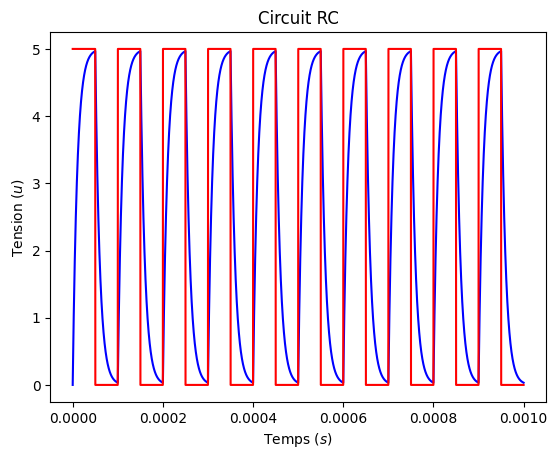

In [167]:
@numpyfy
def e_creneau(t):
    return 0 if t % T > T / 2 else E0

def fu(y, t):
    return (e_creneau(t) - y) / (R * C)

plt.title('Circuit RC')

plt.xlabel('Temps ($s$)')
plt.ylabel('Tension ($u$)')

x, y = euler(fu, t0, 0, tm, T / 1000)
plt.plot(x, y, '-b', label='$u(t)$')
plt.plot(x, e_creneau(x), '-r', label='$e(t)$')

plt.show()

On remarque que plus $T$ est petit, moins le signal ne peut atteindre le régime permanent.

#### 5. Déterminer l’évolution de $u_c(t)$ dans le cas d’un signal en triangle d’amplitude $E_0$ et de période $T$:
#### Que peut–on dire de la tension $u_c(t)$ en fonction du rapport $\dfrac{T}{RC}$ ?

In [168]:
T = 4e-5
t0, tm = 0, 10 * T # s

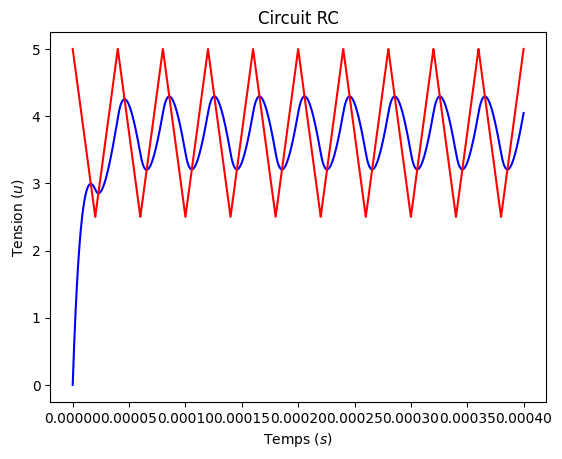

In [169]:
@numpyfy
def e_triangle(t):
    f = lambda n: (n % T) * E0 * (1 / T)
    return f(t) if t % T > T / 2 else - f(t) + E0

def fu(y, t):
    return (e_triangle(t) - y) / (R * C)

plt.title('Circuit RC')

plt.xlabel('Temps ($s$)')
plt.ylabel('Tension ($u$)')

x, y = euler(fu, t0, 0, tm, T / 1000)
plt.plot(x, y, '-b', label='$u(t)$')
plt.plot(x, e_triangle(x), '-r', label='$e(t)$')

plt.show()

Plus $T$ est petit, plus l'amplitude de la tension aux bornes du condensateur est faible.

#### 6. Déterminer l’évolution de $u_c(t)$ dans le cas d’un signal sinusoïdal d’amplitude $E_0$ et de période $T$:
#### Que peut–on dire de la tension $u_c(t)$ en fonction du rapport $\dfrac{T}{RC}$ ?

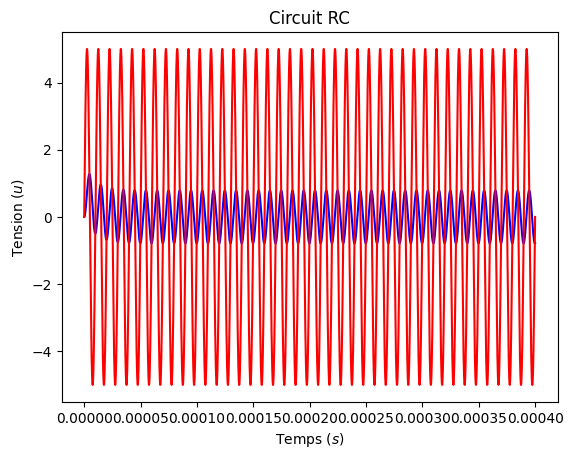

In [170]:
def e_sin(t):
    return np.sin(w * t) * E0

def fu(y, t):
    return (e_sin(t) - y) / (R * C)

plt.title('Circuit RC')

plt.xlabel('Temps ($s$)')
plt.ylabel('Tension ($u$)')

x, y = euler(fu, t0, 0, tm, T / 1000)
plt.plot(x, y, '-b', label='$u(t)$')
plt.plot(x, e_sin(x), '-r', label='$e(t)$')

plt.show()

Même remarque que précédemment.

### Réponse en régime variable à l’aide de la réponse fréquentielle d’un filtre passe–bas

On va maintenant utiliser le fait qu’un circuit $RC$ série est un filtre passe–bas lorsque l’on considère la tension
aux bornes du condensateur comme la sortie du filtre.
On utilisera la même méthode quant au développement du programme (on peut utiliser des fonctionnalités
interactives si on le souhaite).
La valeur de $T$ pour le signal d’entrée est laissée au choix du programmateur.

#### 7. Ecrire la fonction de transfert associée à ce filtre passe–bas.

$$
\underline{H}(jw) = \dfrac1{1+jwRC}
$$

#### 8. Ecrire un programme python permettant de déterminer la fonction $H(f,f_0)$ avec $f$ et $f_0$ les fréquences du signal et propre du filtre respectivement.

In [171]:
def H(f, f0):
    return 1 / (1 + 1j * (f / f0))

def Hw(omega):
    return H(omega, w0)

*Calcul de $\dfrac1{\sqrt{2}}$ pour vérifier*

In [172]:
abs(Hw(w0))

0.7071067811865476

#### 9. A l’aide de cette fonction, tracer le diagramme de Bode en amplitude et en phase de ce filtre.

In [173]:
from math import log10, sqrt

In [174]:
w0 = sqrt(1 / R * C)

In [175]:
w0

3.1622776601683796e-06

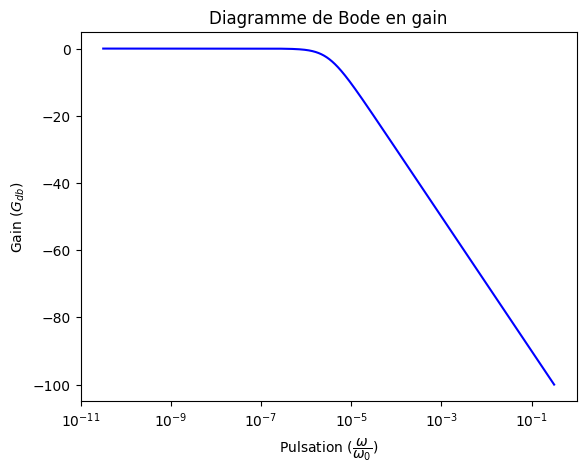

In [176]:
@numpyfy
def Gdb(w):
    return 20 * log10(abs(H(w, w0)))

w = np.logspace(log10(w0) - 5, log10(w0) + 5, 10 ** 5)

plt.title('Diagramme de Bode en gain')

plt.xlabel('Pulsation $(\dfrac{\omega}{\omega_0})$')
plt.ylabel('Gain ($G_{db}$)')
plt.semilogx(w, Gdb(w), '-b', label='$G_{db}$')
plt.show()

In [177]:
from cmath import phase

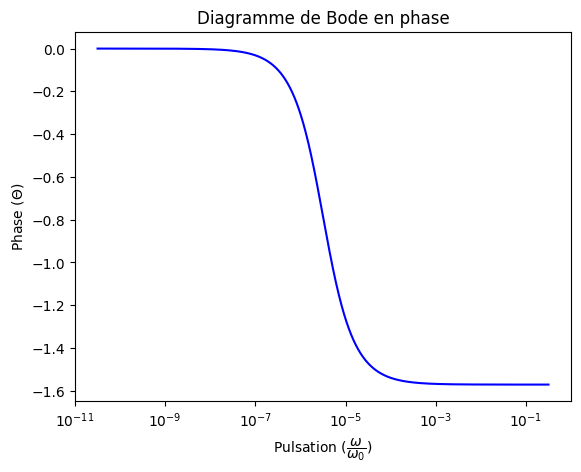

In [178]:
@numpyfy
def phi(w):
    return phase(H(w, w0))

w = np.logspace(log10(w0) - 5, log10(w0) + 5, 10 ** 5)

plt.title('Diagramme de Bode en phase')

plt.xlabel('Pulsation $(\dfrac{\omega}{\omega_0})$')
plt.ylabel('Phase ($\Theta$)')
plt.semilogx(w, phi(w), '-b', label='$\Phi(t)$')

plt.show()

#### 10. Modifier le programme de façon à de nouveau répondre aux questions 4 à 6.

##### 10.4 Déterminer l’évolution de $u_c(t)$ dans le cas d’un signal en créneau d’amplitude $E_0$ et de période $T$:

In [205]:
f = 1 / T
precision = 1000

In [206]:
def fourier_inverse(tab):
    def g(t):
        v = 0
        for i in range(len(tab)):
            amp, depha = tab[i]
            v += amp * np.sin(np.pi * 2 * (2 * i + 1) * f * t + depha)
        return v
    return numpyfy(g)

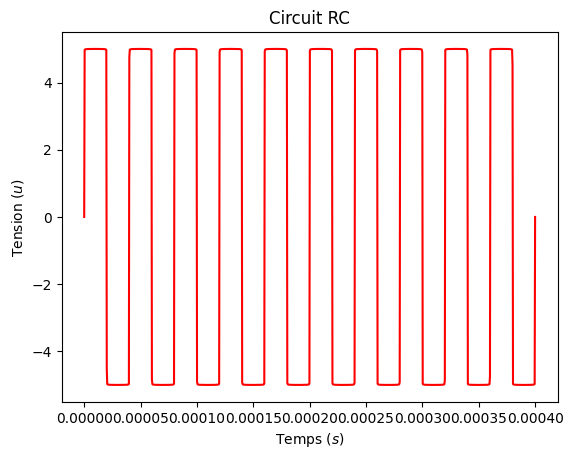

In [207]:
def carre(p):
    t = list()
    for i in range(p):
        t.append(((4 * E0) / (np.pi * (2 * i + 1)), 0))
    return t


plt.title('Circuit RC')

plt.xlabel('Temps ($s$)')
plt.ylabel('Tension ($u$)')

x = np.linspace(t0, tm, 1000)
plt.plot(x, fourier_inverse(carre(precision))(x), '-r', label='$e(t)$')
# plt.plot(x, carre_filtre(x), '-b', label='$u_c(t)$')

plt.show()

*No clue*

## Circuits du deuxième ordre

### Mise en place théorique

#### 11. Déterminer l’équation différentielle vérifiée par la tension $u_c$ aux bornes du condensateur.

$\underline{u_c} = \dfrac1{jwRC+(jw)^2LC+1}\underline{e} = \dfrac1{1 + jwRC - w^2LC}\underline{e}$

D'où

$$
\dfrac{d^2u_c}{dt^2}+\dfrac{R}{L}\dfrac{du_c}{dt}+\dfrac1{LC}u_c=\dfrac{e}{LC}
$$

#### 12. Déterminer l’équation différentielle vérifiée par la tension $u_r$ aux bornes de la résistance.

$\underline{u_r} = \dfrac{jwRC}{jwRC+(jw)^2LC+1}\underline{e} = \dfrac{jwRC}{1 + jwRC - w^2LC}\underline{e}$

D'où

$$
\dfrac{d^2u_r}{dt^2}+\dfrac{R}{L}\dfrac{du_r}{dt}+\dfrac1{LC}u_r=\dfrac{R}{L}\dfrac{de}{dt}
$$

#### 12. Déterminer l’équation différentielle vérifiée par la tension $u_l$ aux bornes de la bobine.

$\underline{u_l} = \dfrac{(jw)^2LC}{jwRC+(jw)^2LC+1}\underline{e}$

D'où

$$
\dfrac{d^2u_l}{dt^2}+\dfrac{R}{L}\dfrac{du_c}{dt}+\dfrac1{LC}u_c=\dfrac{d^2e}{dt^2}
$$